In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from glob import glob
import warnings
warnings.filterwarnings("ignore")



In [2]:
# Paths
train_path = "dataset/TRAIN" 
test_path = "dataset/TEST"




In [3]:
# Data preprocessing
x_data = []
y_data = []

for category in glob(train_path + '/*'):  
    label = category.split('/')[-1]  # Extract category name
    for file in tqdm(glob(category + '/*'), desc=f"Processing {label}"):  
        img = cv2.imread(file)  
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, (128, 128))  # Resize images to 128x128 for uniformity
        x_data.append(img)
        y_data.append(label)


# Create a DataFrame
data = pd.DataFrame({'image': x_data, 'label': y_data}) 

Processing TRAIN\R: 100%|██████████| 9999/9999 [00:16<00:00, 613.71it/s]


In [4]:
# Convert to numpy arrays
x_data = np.array(x_data) / 255.0  # Normalize pixel values
y_data = pd.get_dummies(y_data).values  # One-hot encode labels



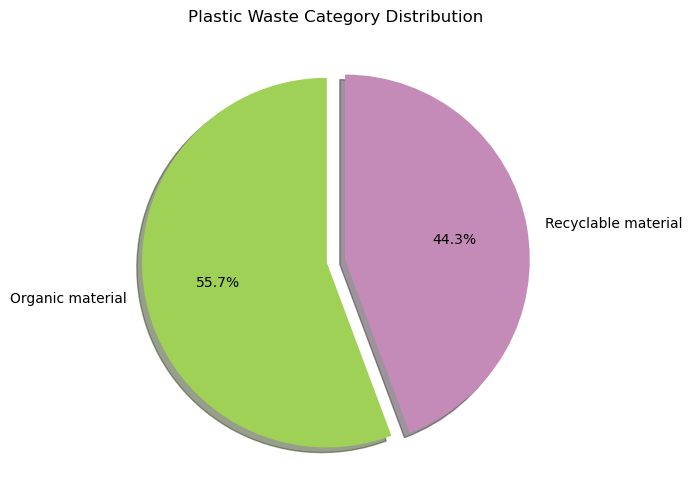

In [5]:
# Visualize class distribution
plt.figure(figsize=(6, 6))

# Correct labels and class distribution
class_counts = pd.Series(y_data.argmax(axis=1)).value_counts()
labels = [category.split('/')[-1] for category in glob(train_path + '/*')]  # Extract class labels

# Ensure colors and explode match the number of classes
colors = ['#a0d157', '#c48bb8', '#6aa6c1', '#ffa500'][:len(class_counts)]  # Adjust colors dynamically
explode = [0.05] * len(class_counts)  # Adjust explode dynamically

# Plot the pie chart
plt.pie(
    class_counts,
    labels=['Organic material','Recyclable material'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=explode,
    shadow =True
)
plt.title("Plastic Waste Category Distribution")
plt.show()


